In [1]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine-date")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) # 0.2, 즉 25%만 테스트세트로 분류

In [6]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [9]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [10]:
print(lr.coef_,lr.intercept_)   # 설명하기 어려운 모델

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


#### 결정 트리
- 설명하기 쉬운 모델

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.996921300750433
0.8576923076923076


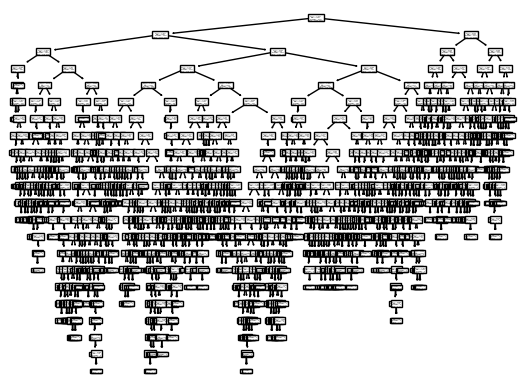

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dt)
plt.show()

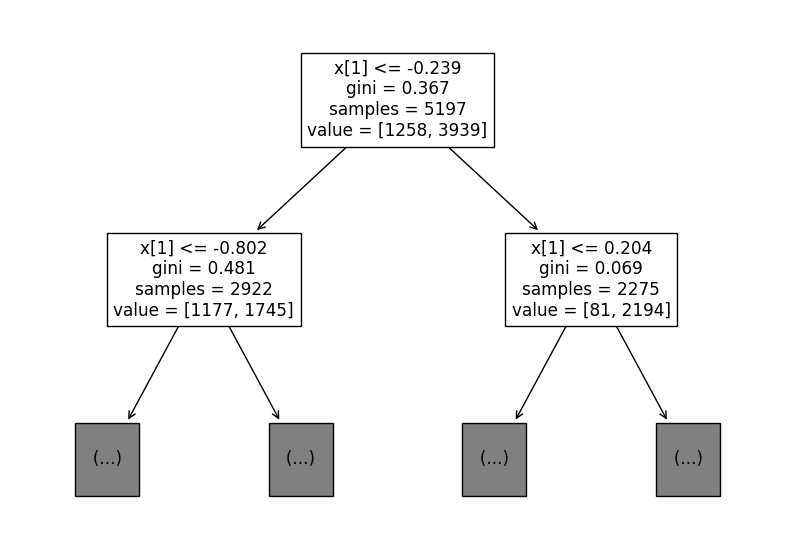

In [13]:
plt.figure(figsize=(10,7))   # 트리 사이즈
plot_tree(dt, max_depth=1)    # 노드 확장 개수 = 1 (가지치기)
plt.show()

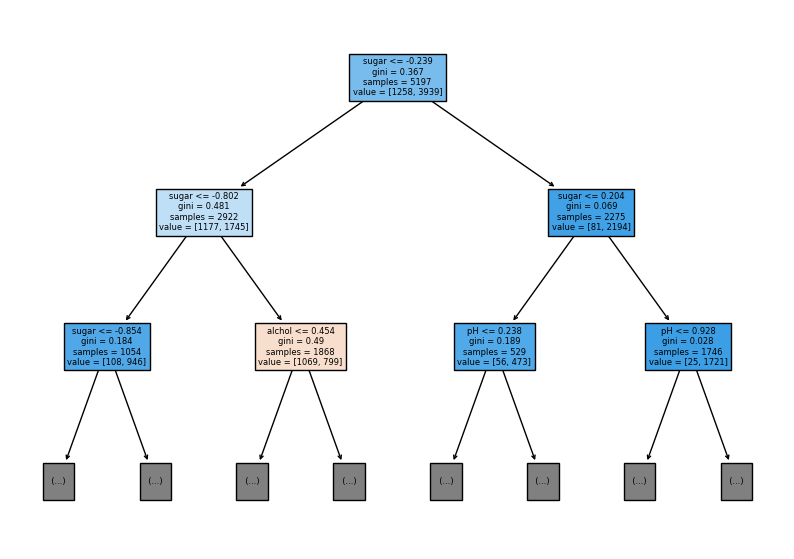

In [14]:
plt.figure(figsize=(10,7))   # 트리 사이즈
plot_tree(dt, max_depth=2, filled=True, feature_names=['alchol', 'sugar', 'pH'])    # filled 매개변수 : 클래스 비율에 따라 색상 지정
plt.show()

회귀문제로 접근 : 리프노드들의 평균<br>
<br>
- gini 불순도<br>
지니불순도가 0인 노드는 클래스의 원소<br>
<br>
- 정보이득 : 조건 설정 시 부모의 불순도에서 자식의 불순도 간 가중 평균 차이<br>
  -> 결정트리는 정보 이득이 높다.<br>

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


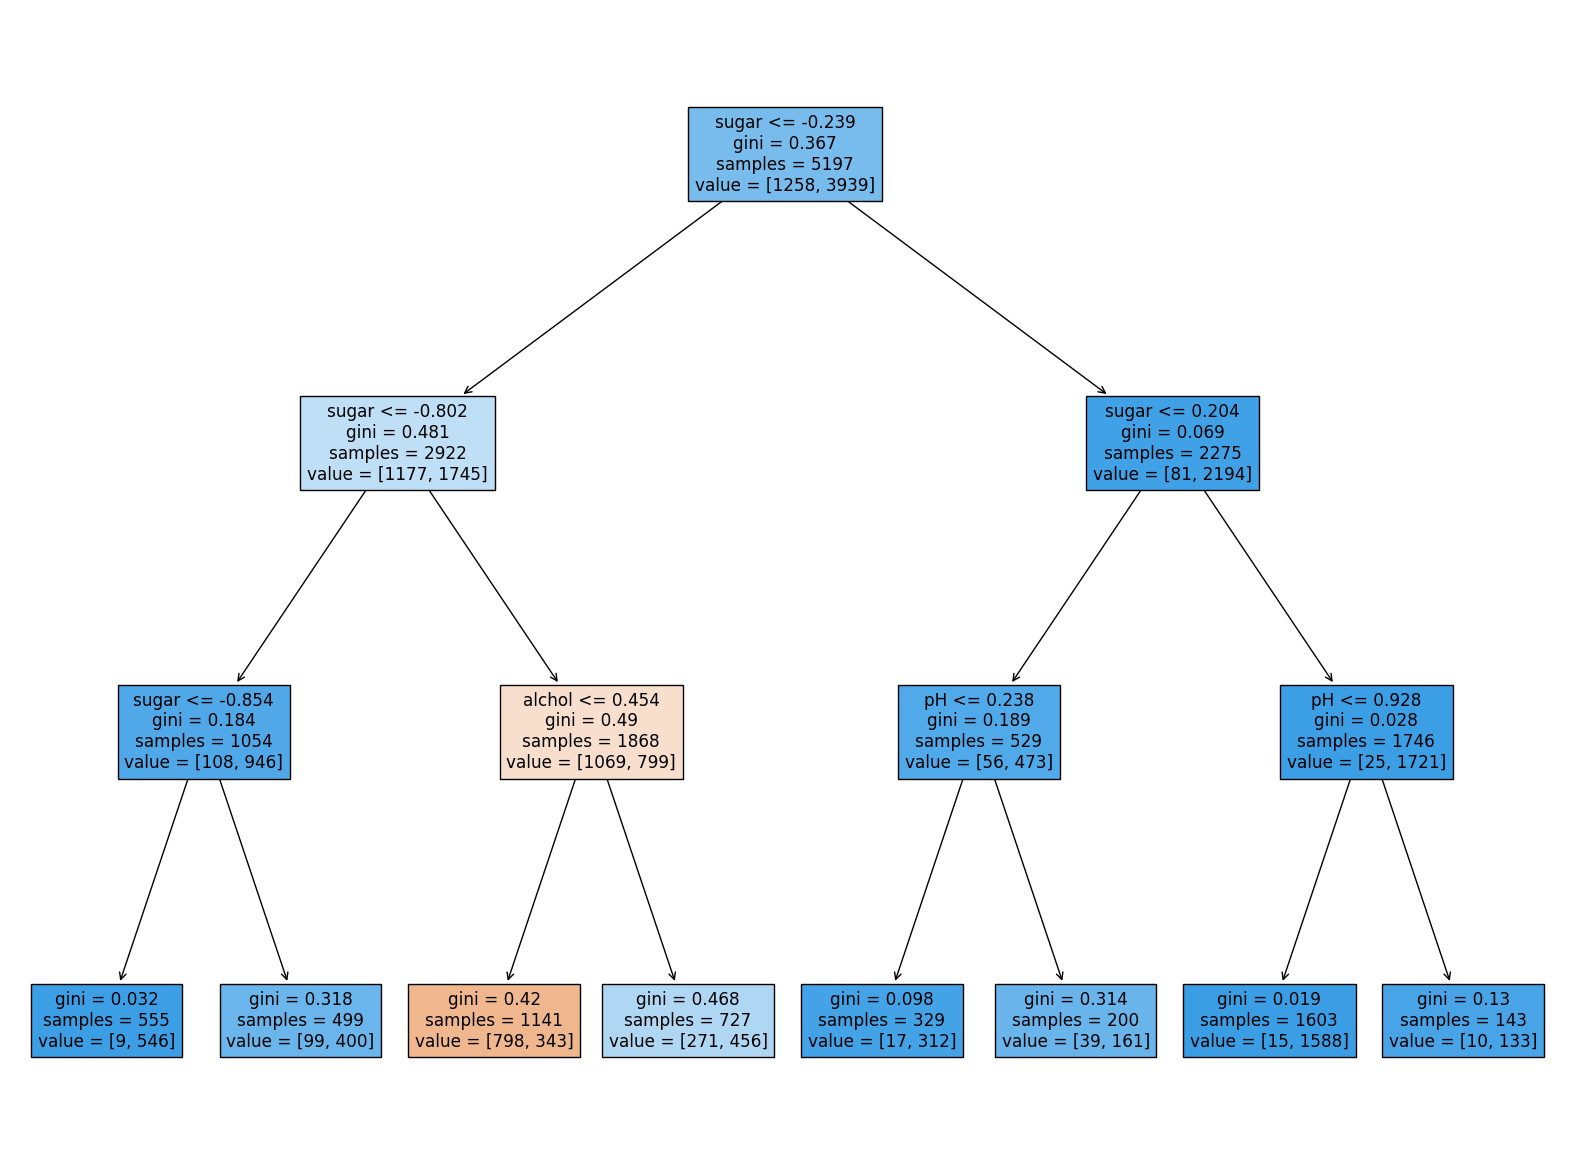

In [16]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

결정 트리에서는 특성값의 스케일이 모델의 성능에 영향을 주지 않는다.<br>
= 데이터를 표준화하든 말든 no상관.<br>
설명하기가 쉬움
-> 새로운 샘플이 들어왔을 경우, <br>

In [17]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


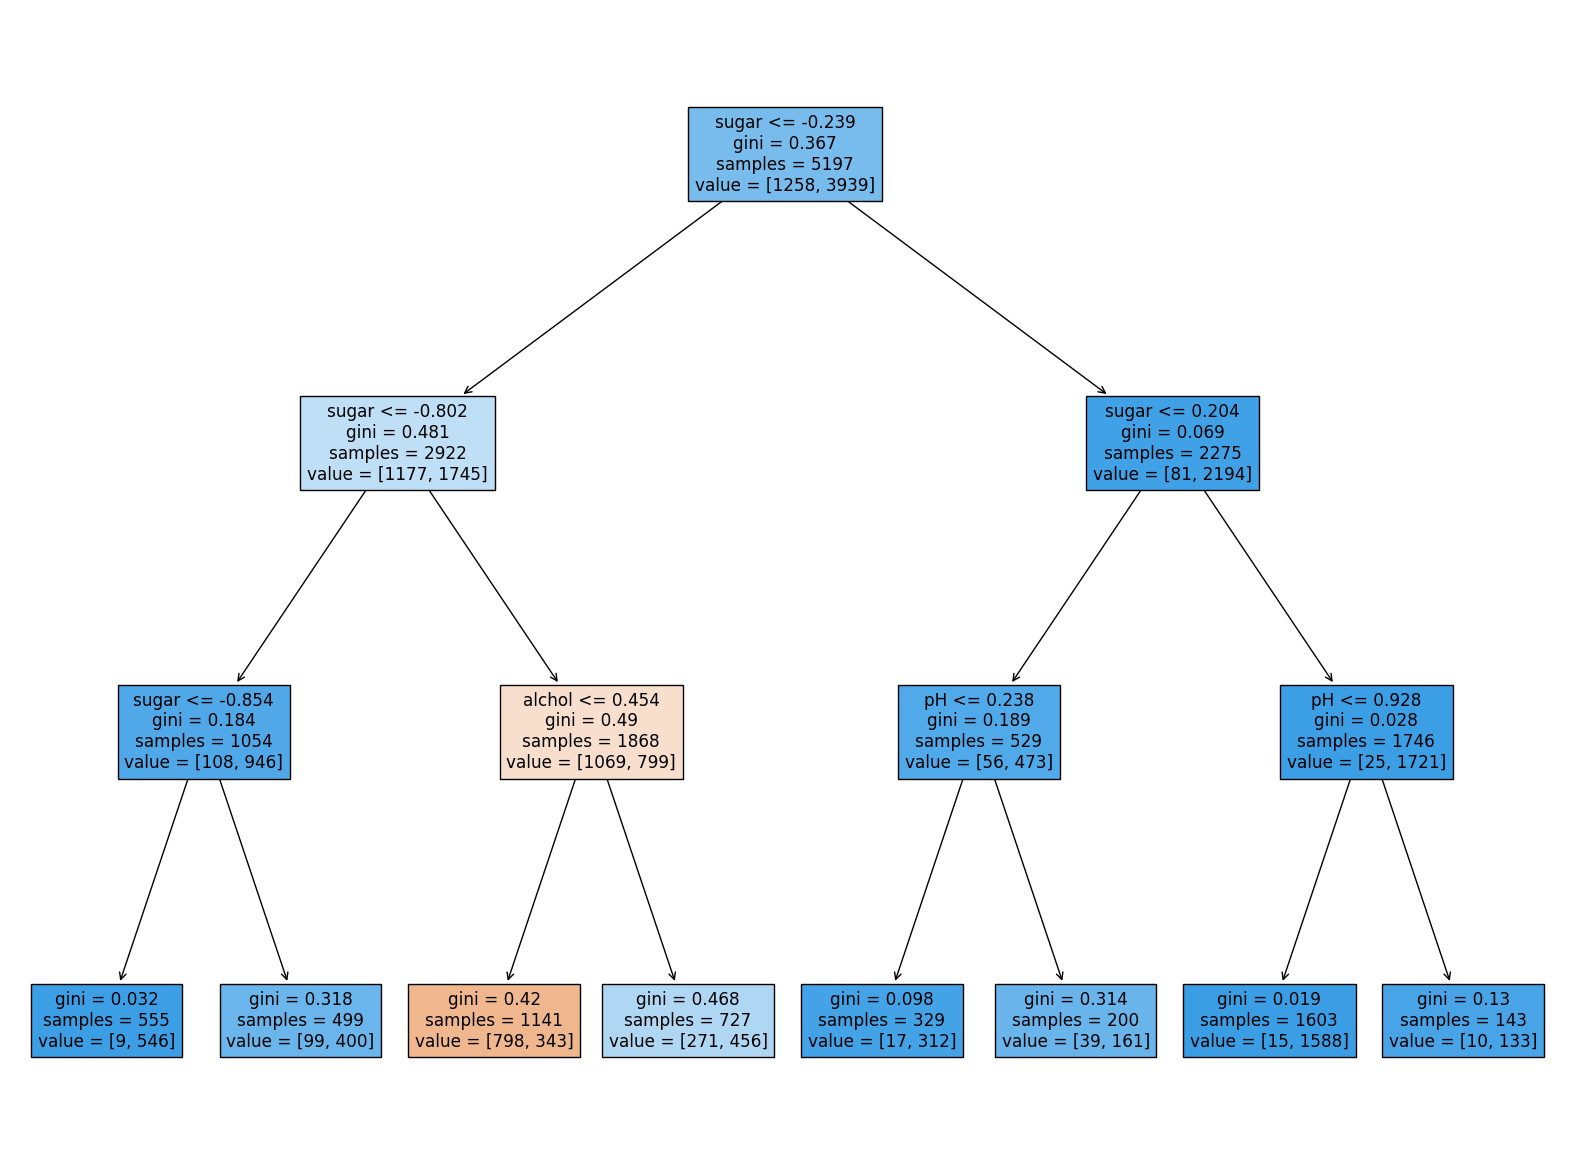

In [18]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchol', 'sugar', 'pH'])
plt.show()

In [19]:
print(dt.feature_importances_)    # 특성 중요도 계산

[0.12345626 0.86862934 0.0079144 ]
